In [1]:
#importing libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")

#for bold
start='\033[1m'
end='\033[0;0m'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
csv_path = '/Users/moritzrichter/Desktop/cryptocurrency_analysis_fintech/machine_learning_model/BTC_analysis/data/All_coins_fiveyears_sorted.csv'
df = pd.read_csv(csv_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows of the DataFrame
print(df.head())

           Name       Date         High          Low         Open  \
0       Bitcoin 2019-04-17  5285.269355  5083.122626  5110.364743   
1        Ripple 2019-04-17     0.331138     0.321118     0.323991   
2      Ethereum 2019-04-17   169.793896   162.671355   163.085245   
3  Binance_Coin 2019-04-17    20.142752    18.985843    19.502150   
4       Cardano 2019-04-17     0.084724     0.081028     0.083096   

         Close        Volume     Marketcap  
0  5280.621478  1.122892e+10  9.101929e+10  
1     0.331138  7.564794e+08  1.362860e+10  
2   169.793896  4.349636e+09  1.747363e+10  
3    20.055316  1.649055e+08  2.760849e+09  
4     0.084645  1.009852e+08  2.153132e+09  


### Finding the top 5 crytpocurrencies by market cap

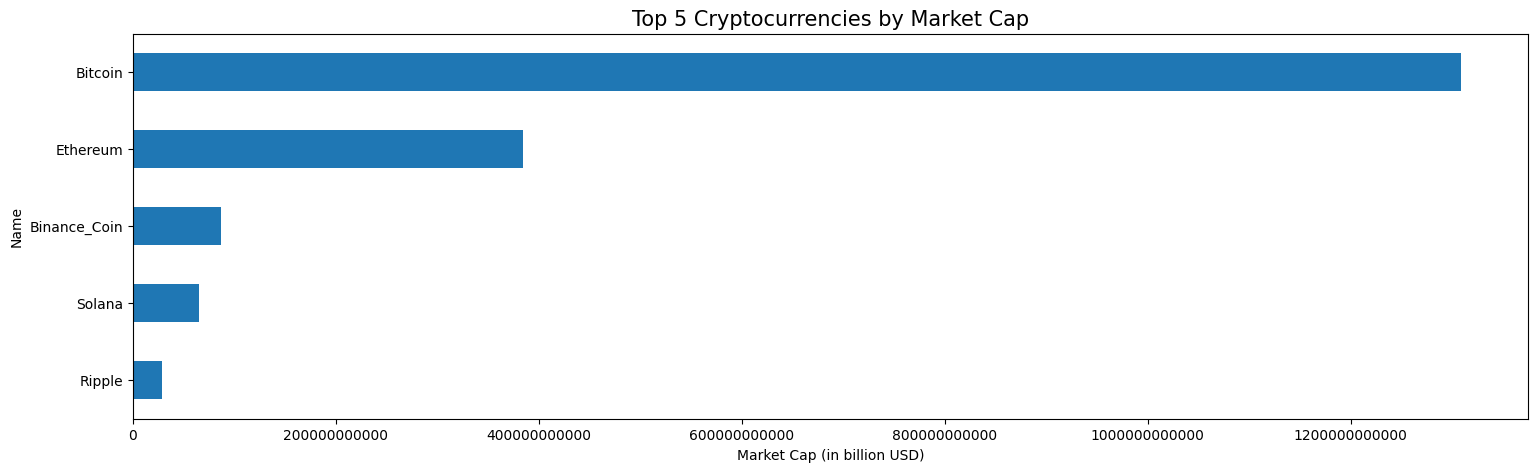

In [4]:
# Set the size of the plot
plt.figure(figsize=(18, 5))

# Create the plot
ax = df.groupby('Name')['Marketcap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')

# Set the x-axis label
ax.set_xlabel("Market Cap (in billion USD)")

# Set the format of the tick labels on the x-axis to plain (no scientific notation)
ax.ticklabel_format(style='plain', axis='x')

# Set the title of the plot
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)

# Display the plot
plt.show()

### Observation:
Here we can see that Bitcoin is the highest value according to market cap and etherum is 50% of it.
and all other are very less in comparison to it and USDT is 3 times less then the Etherum

### Plotting Graphs of Closing Prices of Top 4 Cryptocurrencies as per Market Cap

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  # For date formatting

# Load your data
csv_path = '/Users/moritzrichter/Desktop/cryptocurrency_analysis_fintech/machine_learning_model/BTC_analysis/data/All_coins_fiveyears_sorted.csv'
dx = pd.read_csv(csv_path)

# Convert 'Date' column to datetime
dx['Date'] = pd.to_datetime(dx['Date'])

# Define function for dynamic top currency retrieval
def get_top_currencies(data, exclude=[], top_n=4):
    filtered_data = data[~data['Name'].isin(exclude)]
    return filtered_data.groupby('Name')['Marketcap'].last().sort_values(ascending=False).head(top_n).index

# Fetch top currency names with dynamic exclusions
top_4_currency_names = get_top_currencies(dx, top_n=4)
top_4_currency_names_except_first = get_top_currencies(dx, exclude=['Bitcoin'], top_n=4)
top_4_currency_names_except_first_two = get_top_currencies(dx, exclude=['Bitcoin', 'Ethereum'], top_n=4)

# Creating filtered datasets for each category
data_top_4_currencies = dx[dx['Name'].isin(top_4_currency_names)]
top_4_currencies_after_BTC = dx[dx['Name'].isin(top_4_currency_names_except_first)]
top_4_currencies_after_BTC_ETH = dx[dx['Name'].isin(top_4_currency_names_except_first_two)]

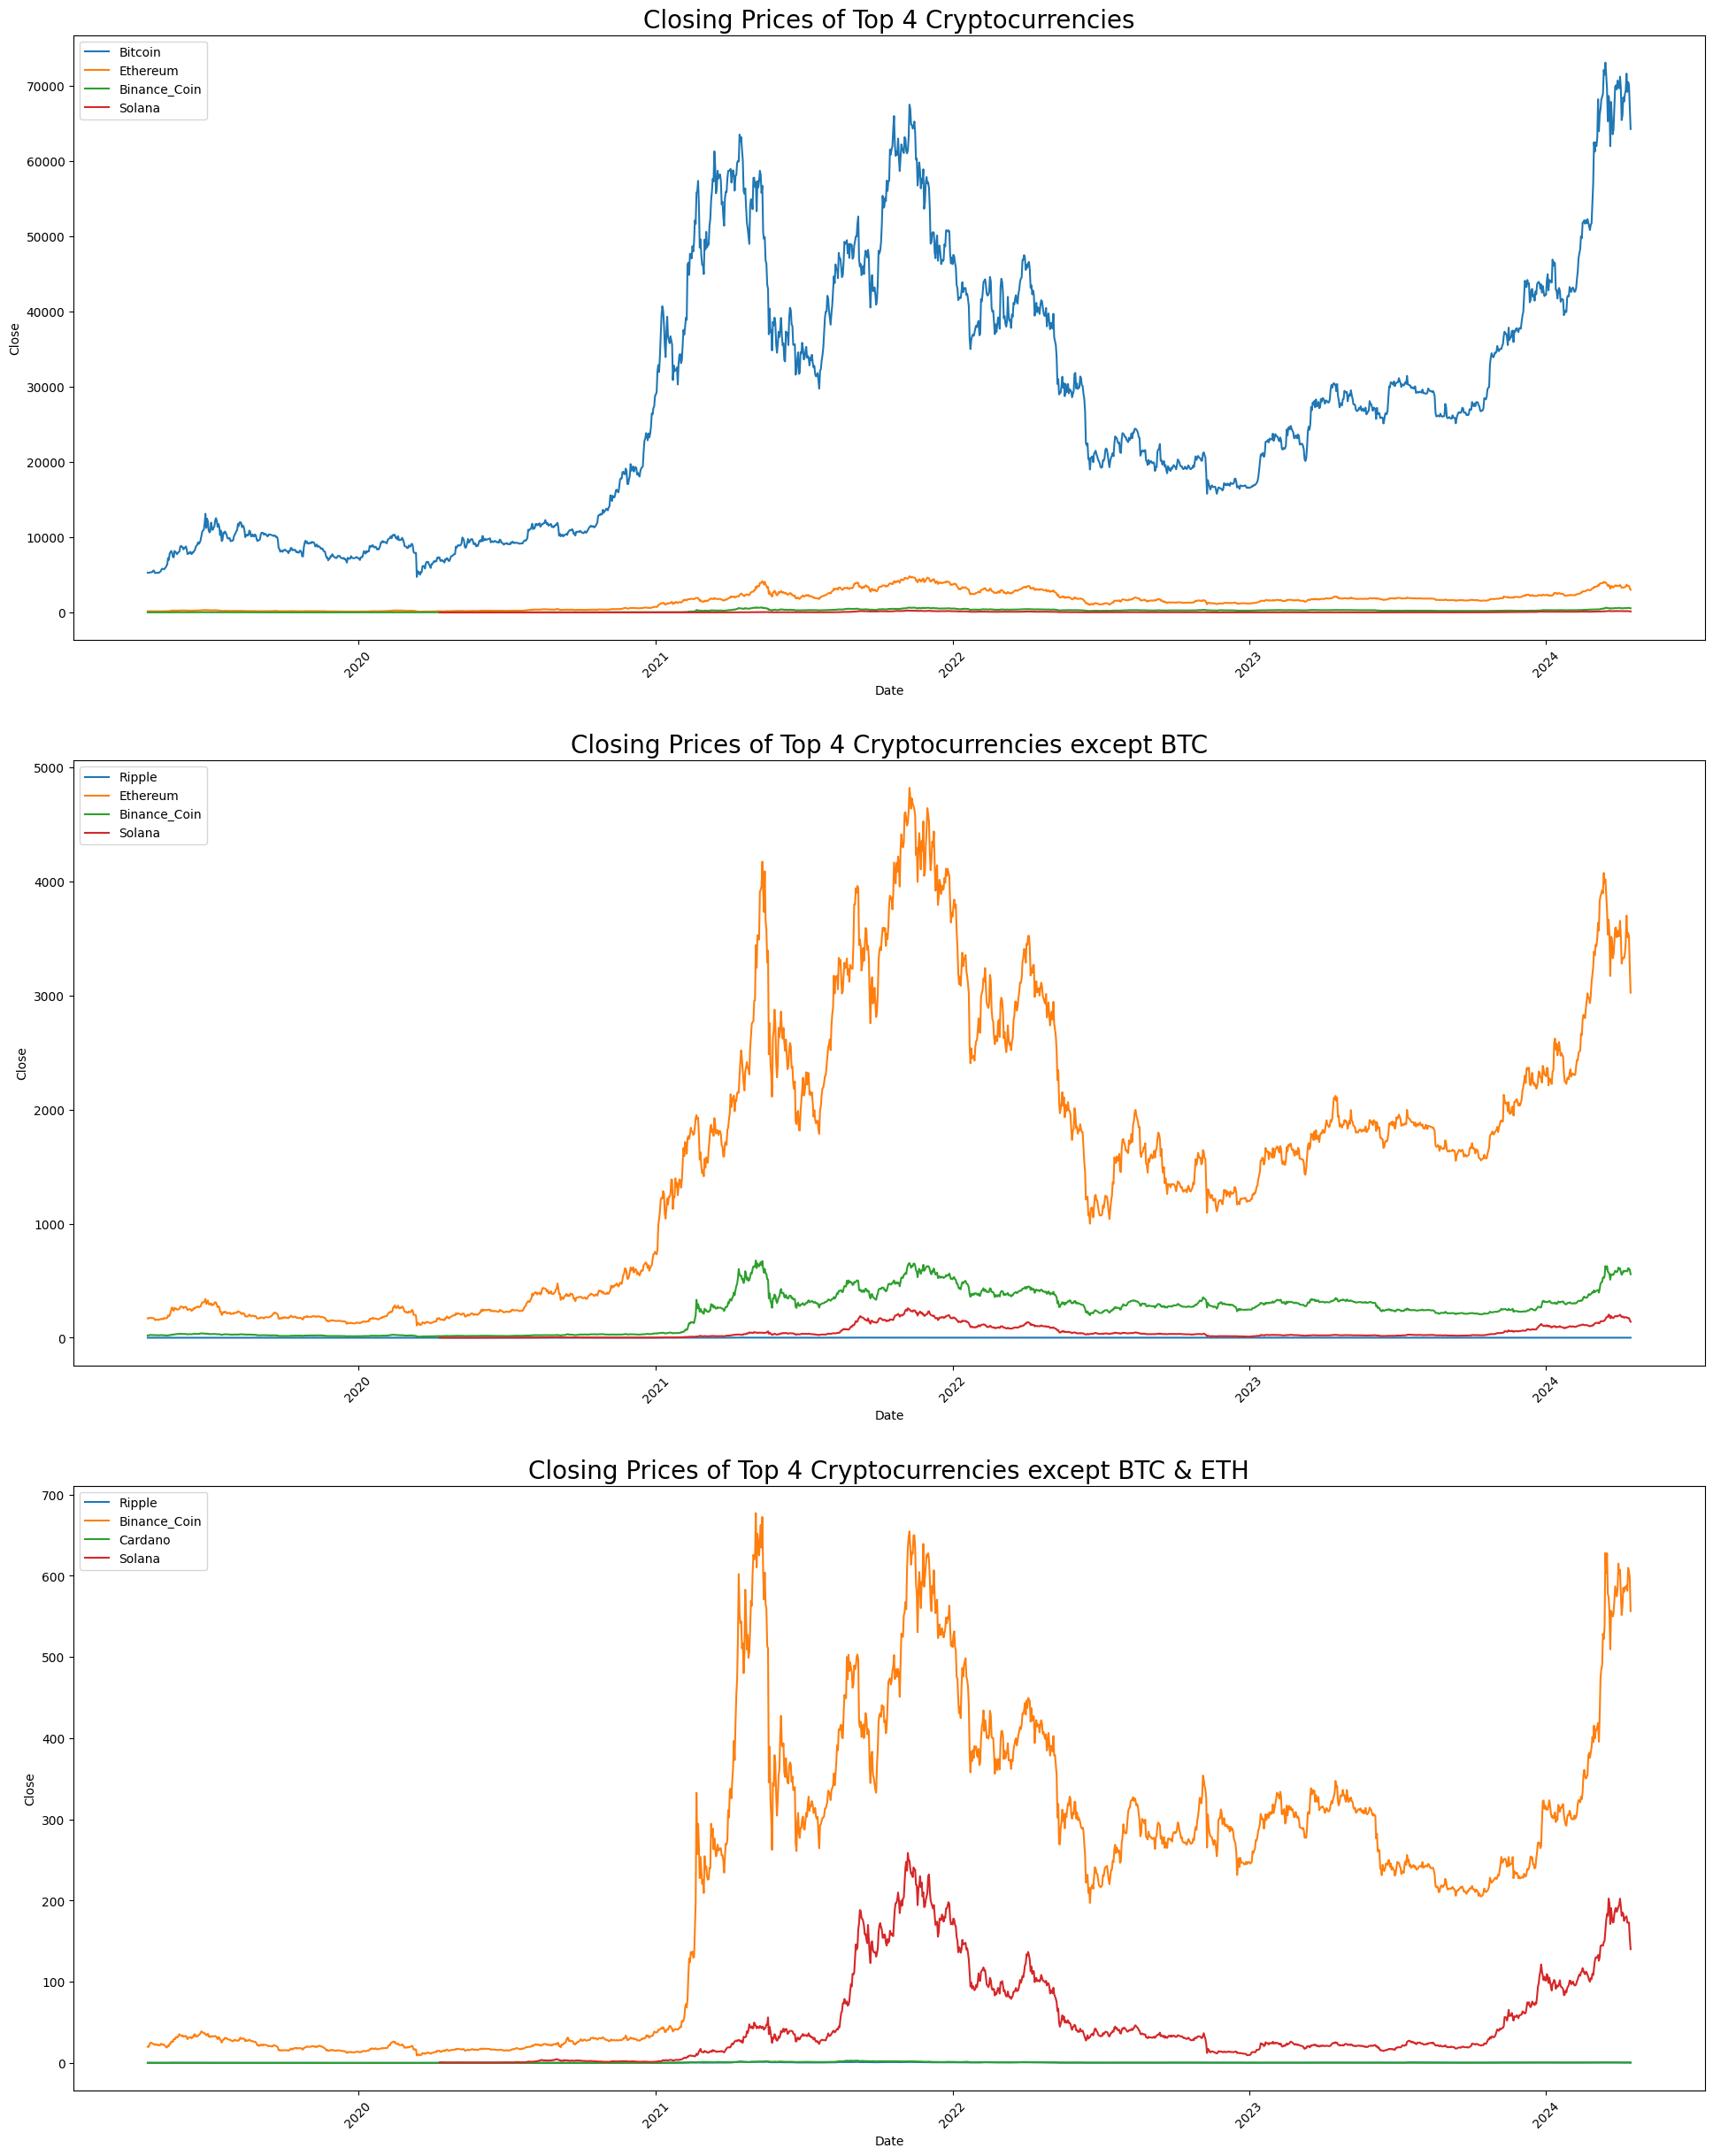

In [7]:
# Set the size of the entire figure
plt.figure(figsize=(20, 25))

# Formatter for the date
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

# Plot for top 4 currencies
ax1 = plt.subplot(3, 1, 1)
sns.lineplot(data=data_top_4_currencies, x="Date", y="Close", hue='Name')
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Plot for top 4 currencies excluding BTC
ax2 = plt.subplot(3, 1, 2)
sns.lineplot(data=top_4_currencies_after_BTC, x="Date", y="Close", hue='Name')
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Plot for top 4 currencies excluding BTC and ETH
ax3 = plt.subplot(3, 1, 3)
sns.lineplot(data=top_4_currencies_after_BTC_ETH, x="Date", y="Close", hue='Name')
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC & ETH", fontsize=20)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout(pad=3.0)
plt.show()

### Observation:
In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In [8]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [14]:
for i in ['BTC','ETH','BNB','ADA']:
    options=[i]
    rslt_df = df[df['Name'].isin(options)] 
    layout = dict(
            title=f"{i} Candlestick Chart",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Time")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price US Dollars"))
    )
    data=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data,layout=layout)

    figSignal.show()

### Observation:
Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.


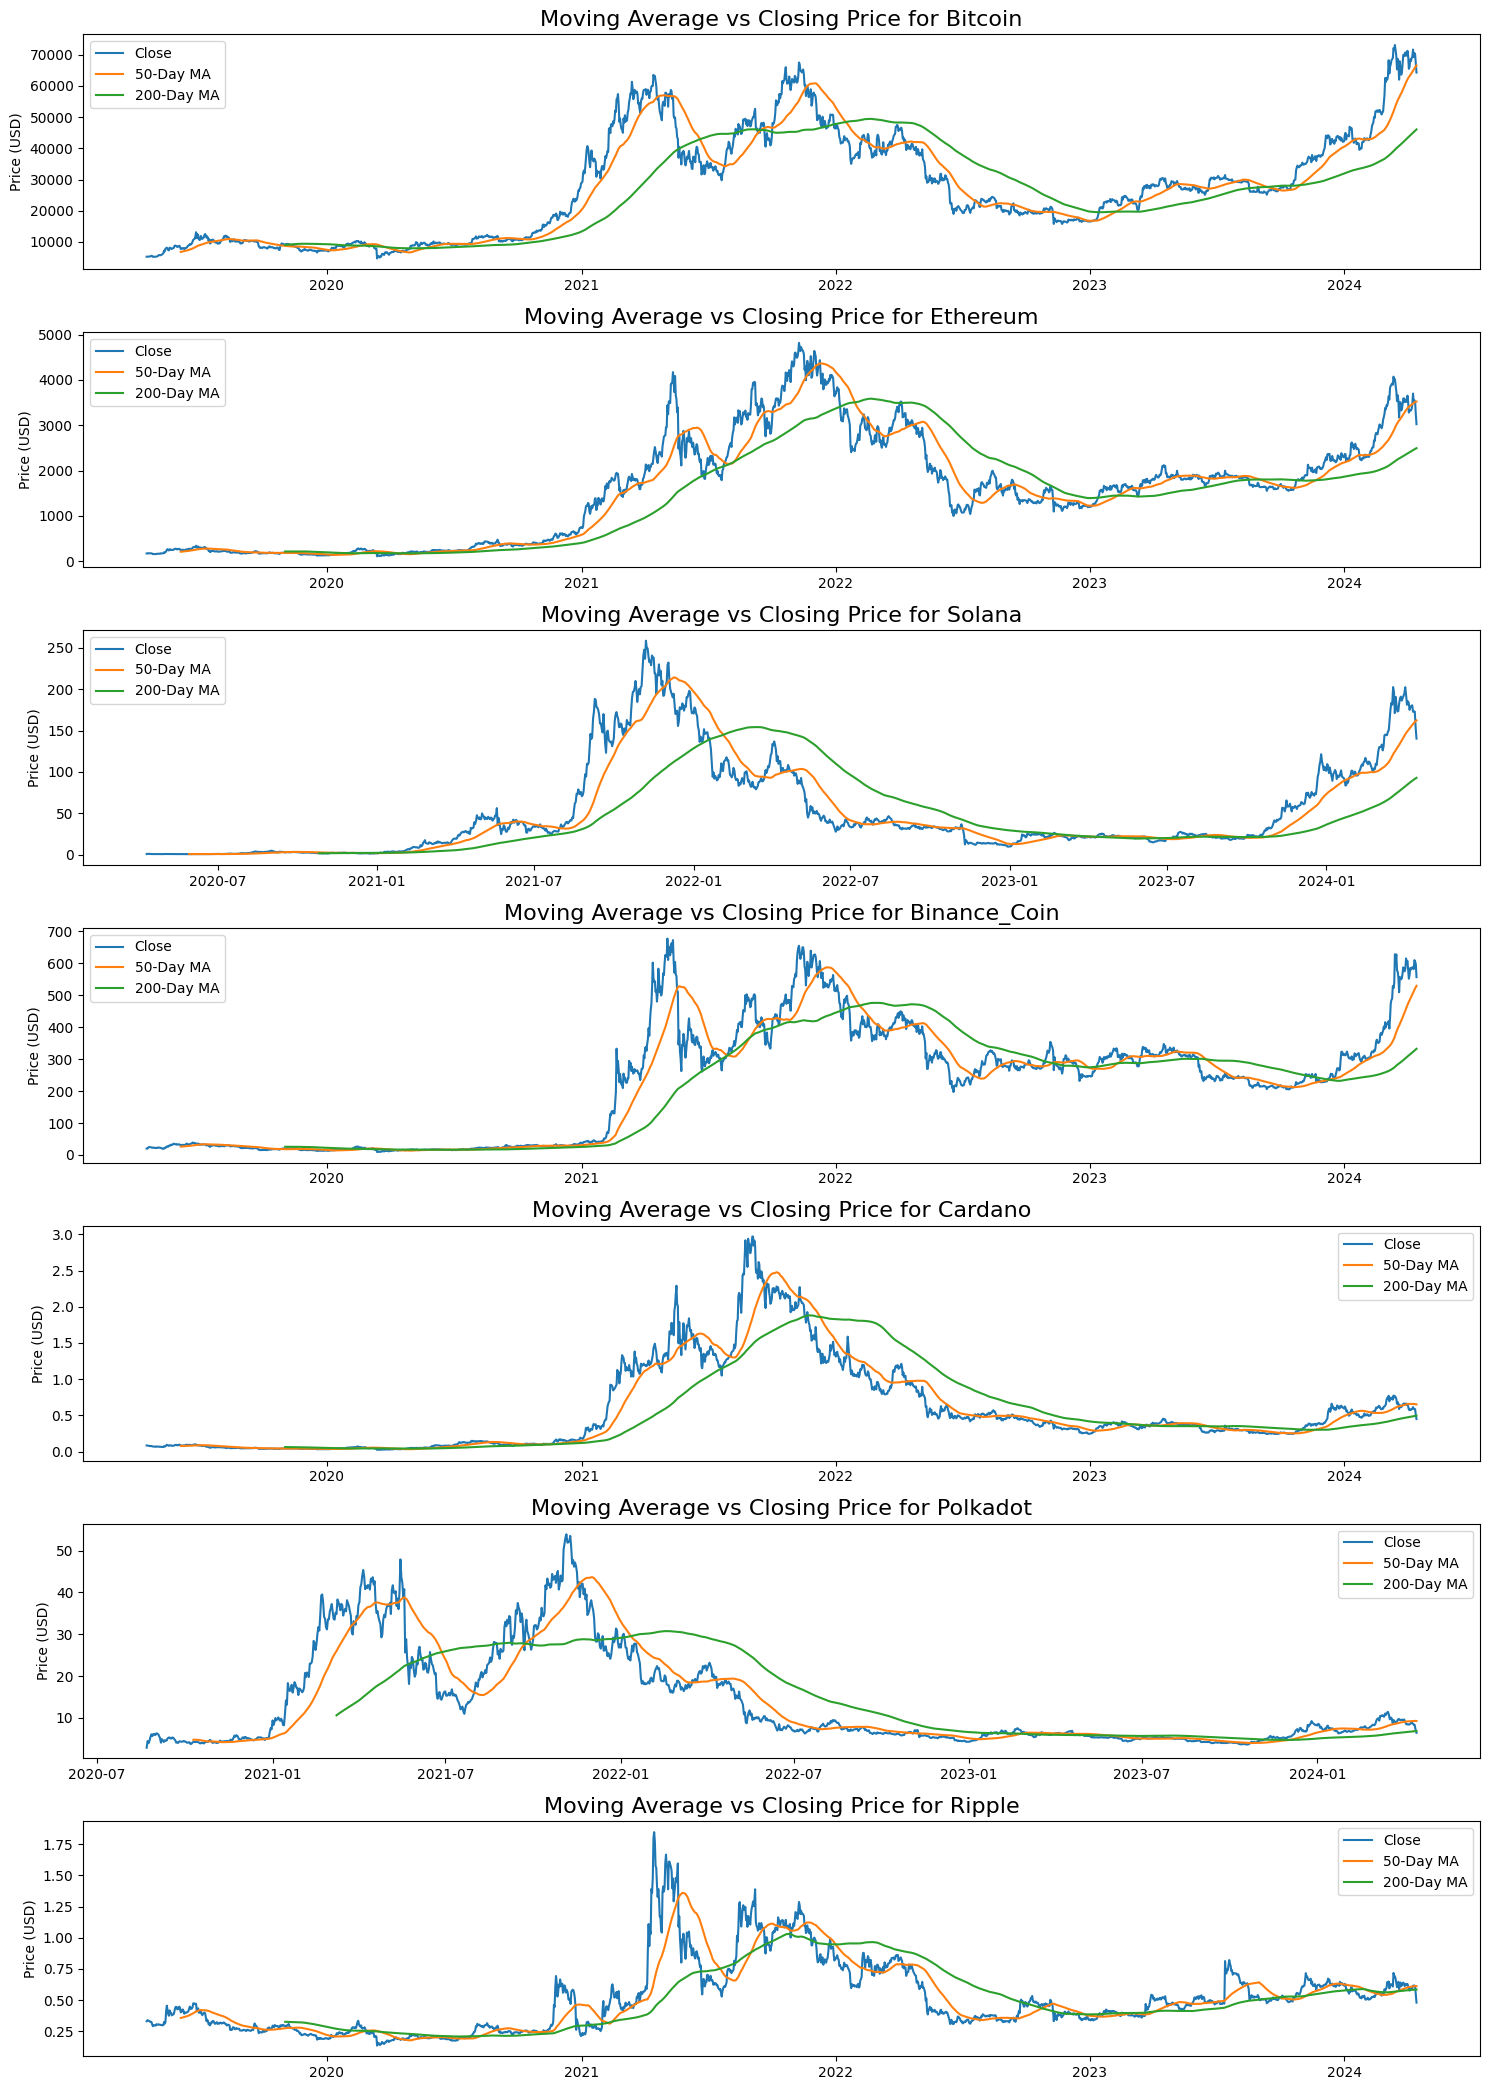

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with your data
# Create a mapping from generic names to your DataFrame's column names including Polkadot and Ripple
crypto_mapping = {
    'BTC': 'Bitcoin',
    'ETH': 'Ethereum',
    'SOL': 'Solana',  # Assuming you have data for Solana; replace if needed
    'BNB': 'Binance_Coin',
    'ADA': 'Cardano',
    'DOT': 'Polkadot',  # Assuming you have data for Polkadot; replace if needed
    'XRP': 'Ripple'
}

plt.figure(figsize=(15, 21))  # Set the figure size for the entire figure, adjusted for 7 plots

j = 1  # Initialize outside the loop to ensure subplots are in different rows

for symbol, name in crypto_mapping.items():
    dft = df[df['Name'] == name]
    
    # Ensure your Date column is in the correct datetime format
    dft['Date'] = pd.to_datetime(dft['Date'])

    # Calculate moving averages
    dft['Moving Average 50'] = dft['Close'].rolling(window=50).mean()
    dft['Moving Average 200'] = dft['Close'].rolling(window=200).mean()
    
    # Plot setup for each cryptocurrency
    plt.subplot(len(crypto_mapping), 1, j)  # Adjust the number of rows based on the length of the mapping
    plt.plot(dft['Date'], dft['Close'], label='Close')
    plt.plot(dft['Date'], dft['Moving Average 50'], label='50-Day MA')
    plt.plot(dft['Date'], dft['Moving Average 200'], label='200-Day MA')
    plt.ylabel("Price (USD)")
    plt.title(f"Moving Average vs Closing Price for {name}", fontsize=16)
    plt.legend()

    j += 1  # Increment to move to the next subplot for the next iteration

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


### Observation:

In BTC and ETH

They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT

There are too many golden cross and death cross.
Hence it is a volatile stock and should be avoided for the time being.

In [18]:
import plotly.express as px

In [19]:
import plotly.express as px

# Assuming 'df' is your DataFrame loaded with cryptocurrency data
# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create an area plot
area = px.area(data_frame=df, 
               x="Date", 
               y="High", 
               line_group="Name", 
               color="Name", 
               color_discrete_sequence=px.colors.qualitative.Alphabet_r, 
               title='Area Plot for TOP Cryptocurrencies')

# Update x-axis with a range slider and range selector buttons
area.update_xaxes(
    title_text='Date',
    rangeslider_visible=True,
    rangeselector=dict(buttons=[
        dict(count=1, label='1M', step='month', stepmode='backward'),
        dict(count=6, label='6M', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1Y', step='year', stepmode='backward'),
        dict(step='all')
    ])
)

# Update y-axis settings
area.update_yaxes(title_text='Price in USD', ticksuffix='$')

# Update layout to enhance title positioning and enable legend
area.update_layout(
    showlegend=True,
    title={'text': 'Area Plot for TOP Cryptocurrencies', 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}
)

# Display the plot
area.show()


In [20]:
import plotly.express as px
import pandas as pd

# Assuming 'df' is your DataFrame loaded with cryptocurrency data
# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create an area plot for market capitalization
area = px.area(data_frame=df, 
               x="Date", 
               y="Marketcap", 
               line_group="Name", 
               color="Name",
               color_discrete_sequence=px.colors.qualitative.Alphabet, 
               title='Market Cap Change of all Cryptocurrencies')

# Update x-axis with a range slider and range selector buttons
area.update_xaxes(
    title_text='Date',
    rangeslider_visible=True,
    rangeselector=dict(buttons=[
        dict(count=1, label='1M', step='month', stepmode='backward'),
        dict(count=6, label='6M', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1Y', step='year', stepmode='backward'),
        dict(step='all')
    ])
)

# Update y-axis settings
area.update_yaxes(title_text='Market Cap (USD)', ticksuffix='$')

# Update layout to enhance title positioning and enable legend
area.update_layout(
    showlegend=True,
    title={'text': 'Market Cap Change of all Cryptocurrencies', 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}
)

# Display the plot
area.show()

### Conclusion:
Bitcoin is the highest value according to market cap and etherum is 50% of it and all other are very less in comperision to it and USDT is 3 times less then the Etherum

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In BTC and ETH --They have shown a pattern of 2 golden cross and 2 death cross over the years.
The last crossing point of moving averages was golden cross hence it was bullish.

In USDT --
There are too many golden cross and death cross.
Hence it is a volatile stock and should be avoided for the time being.